# **Porosity and Permeability Analysis of Sedimentary Rocks**

This project explores the topic of porosity and permeability in detrital sedimentary rocks. 

**Definitions:**
```
> Porosity: the proportion of pore (void) spaces in a rock that is not occupied by solid matter
> Permeability: the interconnectivity between the pore spaces
> Detrital sedimentary rocks: rocks that are made of clasts, detritus, or fragments of other rocks and/or minerals
```

**Significance:**
Porosity gives an indication as to how much fluid (oil, gas, and/or water) can be extracted from a rock. Rocks with high porosity are likely to hold more fluid. 
Permeability gives an indication as to how easily it is to extract fluid from the rock. Typically, fluid in rocks with high permeability are likely to be more easily extracted.
 
Ideally, to enhance hydrocarbon and groundwater recovery for consumption, we want to locate rocks with high porosity and high permeability.

**Audience:**
This report is suitable for geologists, petrophysicists, engineers, or anybody who is interested in rocks at the pore scale! 


**Dataset:**
Porosity and permeability datasets were gathered from 18 US Geological Survey (USGS) [publications](https://pubs.usgs.gov/of/2003/ofr-03-420/Table1.htm):
* Publication no. 1,2,3,5,29,34,35,37,39,41,49,56,57,58,60,61,63,66 were selected based on availability of data and data completeness
*	Porosity, permeability, grain size, and ancient depositional environment data are available [here](https://pubs.usgs.gov/of/2003/ofr-03-420/spreadsht.zip)
*	Depositional environment data are also available [here](https://pubs.usgs.gov/of/2003/ofr-03-420/desc_rtf.zip)

Since the datasets provided by USGS are semi-structured to unstructured, I have manually compiled them into [18 structured csv](https://github.com/mfarnas/tf-sharing-github/tree/master/poro_perm)'s corresponding to each selected publication. The columns of interest are: 

| Column        | Description   | Type|
| ------------- |-------------| ---|
| PORO      | porosity | continuous |
| PERM      | permeability | continuous |
| GRAINSIZE.1*      | grain size | categorical |
| EOD_NMT**      | depositional environment | categorical |

\*For consistency, continuous grain-size values were converted into categorical data using the [Krumbein phi scale](https://wiki.seg.org/wiki/Sandstone#Grain_Size_and_Roundness).

\**I have also exerted domain knowledge to broadly classify the depositional environments into marine (M), transitional (T), and non-marine (NM).

---

**Research Questions:**

This research aims to answer the following questions:
1. Is there a correlation between porosity and permeability?
2. Is there a significant difference in porosity and permeability in different depositional environments?
3. Is there a significant difference in porosity and permeability in sedimentary deposits of different grain sizes?

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats

# Load & combine publication data into a master dataframe.

In [0]:
# get a list of .csv files available in poro_perm folder
file_loc = r".\poro_perm"

fileslist = [f for f in os.listdir(file_loc) 
          if os.path.isfile(os.path.join(file_loc, f)) and f.endswith(".csv")]

file = iter(fileslist)

In [0]:
# pass the next file name to the corresponding variables
f1 = next(file)
f2 = next(file)
f3 = next(file)
f4 = next(file)
f5 = next(file)
f6 = next(file)
f7 = next(file)
f8 = next(file)
f9 = next(file)
f10 = next(file)
f11 = next(file)
f12 = next(file)
f13 = next(file)
f14 = next(file)
f15 = next(file)
f16 = next(file)
f17 = next(file)
f18 = next(file)
print(f18) # check for the last file name -- pass!

Master_Poro_Perm_66.csv


In [0]:
df1 = pd.read_csv(file_loc + '\{}'.format(f1), skiprows = [1])
df2 = pd.read_csv(file_loc + '\{}'.format(f2), skiprows = [1])
df3 = pd.read_csv(file_loc + '\{}'.format(f3), skiprows = [1])
df4 = pd.read_csv(file_loc + '\{}'.format(f4), skiprows = [1])
df5 = pd.read_csv(file_loc + '\{}'.format(f5), skiprows = [1])
df6 = pd.read_csv(file_loc + '\{}'.format(f6), skiprows = [1])
df7 = pd.read_csv(file_loc + '\{}'.format(f7), skiprows = [1])
df8 = pd.read_csv(file_loc + '\{}'.format(f8), skiprows = [1])
df9 = pd.read_csv(file_loc + '\{}'.format(f9), skiprows = [1])
df10 = pd.read_csv(file_loc + '\{}'.format(f10), skiprows = [1])
df11 = pd.read_csv(file_loc + '\{}'.format(f11), skiprows = [1])
df12 = pd.read_csv(file_loc + '\{}'.format(f12), skiprows = [1])
df13 = pd.read_csv(file_loc + '\{}'.format(f13), skiprows = [1])
df14 = pd.read_csv(file_loc + '\{}'.format(f14), skiprows = [1])
df15 = pd.read_csv(file_loc + '\{}'.format(f15), skiprows = [1])
df16 = pd.read_csv(file_loc + '\{}'.format(f16), skiprows = [1])
df17 = pd.read_csv(file_loc + '\{}'.format(f17), skiprows = [1])
df18 = pd.read_csv(file_loc + '\{}'.format(f18), skiprows = [1])

In [0]:
# select relevant columns: porosity, permeability, grainsize, and environment of deposition
col = ['PORO','PERM','GRAINSIZE.1','EOD_NMT']
df1 = df1[col]
df2 = df2[col]
df3 = df3[col]
df4 = df4[col]
df5 = df5[col]
df6 = df6[col]
df7 = df7[col]
df8 = df8[col]
df9 = df9[col]
df10 = df10[col]
df11 = df11[col]
df12 = df12[col]
df13 = df13[col]
df14 = df14[col]
df15 = df15[col]
df16 = df16[col]
df17 = df17[col]
df18 = df18[col]

In [0]:
# combine all dataframes into a single master dataframe
df_master = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18])
df_master['GRAINSIZE.1'] = np.where(df_master['GRAINSIZE.1'] == 'Vf', 'vf', df_master['GRAINSIZE.1'])

grainsize_dict = {'c': '00. c',
                 'm': '01. m',
                 'f': '02. f',
                 'vf': '03. vf'}
df_master['GRAINSIZE.1'] = df_master['GRAINSIZE.1'].map(grainsize_dict)

df_master = df_master.rename(columns = {'GRAINSIZE.1':'GRAINSIZE_CAT'})
df_master.head()

,PORO,PERM,GRAINSIZE_CAT,EOD_NMT
0,16.7,0.70,03. vf,M
1,2.2,0.01,03. vf,M
2,13.3,2.40,03. vf,M
3,13.2,0.90,03. vf,M
4,11.3,1.25,03. vf,M


# 1. Is there a correlation between porosity and permeability?

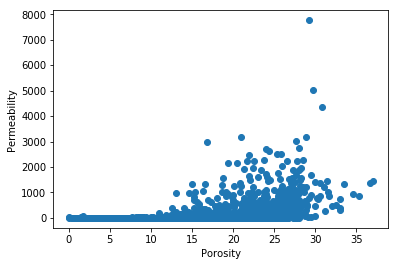

In [0]:
df = df_master.dropna(subset = ['PORO', 'PERM'])

plt.plot(df.PORO, df.PERM, 'o')
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.show()

In [0]:
# R for PORO-PERM
stats.pearsonr(df.PORO, df.PERM)

(0.42451428062863805, 2.6240960238125533e-178)

The Pearson's correlation coefficient reveals a moderate positive correlation between porosity and permeability (R~0.42). Next, we log-transform the permeability data to observe its effect.

C:\Users\Firdaus Ridzuan\.conda\envs\deeplearning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Firdaus Ridzuan\.conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


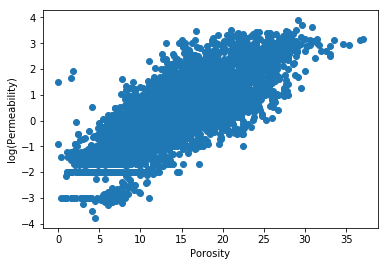

In [0]:
# log-transform the data to get a more linear distribution
df['perm_log10'] = np.log10(df.PERM)

# remove infinity values
inf = np.inf
df_log = df.query('perm_log10 != -@inf')

plt.plot(df_log.PORO, df_log.perm_log10, 'o')
plt.xlabel('Porosity')
plt.ylabel('log(Permeability)')
plt.show()

In [0]:
# R for PORO, log(PERM) - better result!
stats.pearsonr(df_log.PORO, np.log10(df_log.PERM))

(0.8192475649684221, 0.0)

The log transformation reveals a strong positive correlation between porosity and log(permeability) (R~0.82).  
We can find the equation of the line of best fit as the following:

In [0]:
denominator = df_log.PORO.dot(df_log.PORO) - df_log.PORO.mean() * df_log.PORO.sum()

m = (df_log.PORO.dot(np.log10(df_log.PERM)) - np.log10(df_log.PERM).mean() * df_log.PORO.sum()) / denominator
b = (np.log10(df_log.PERM).mean() * df_log.PORO.dot(df_log.PORO) - df_log.PORO.mean() * df_log.PORO.dot(np.log10(df_log.PERM))) / denominator

y_pred = m * df_log.PORO + b

print('Line of best fit: log(permeability) = {:04.2f}*porosity {:=04.2f}'.format(m, b))

Line of best fit: log(permeability) = 0.18*porosity -2.28


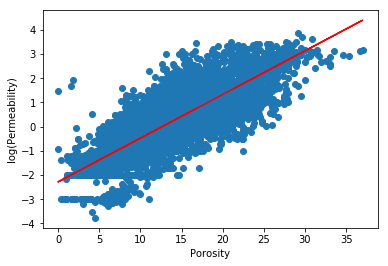

In [0]:
plt.plot(df_log.PORO, df_log.perm_log10, 'o')
plt.plot(df_log.PORO, y_pred, 'r')
plt.xlabel('Porosity')
plt.ylabel('log(Permeability)')
plt.show()

# 2. Analyzing the Effect of Depositional Environments



## a) Is there a significant difference in porosity in different depositional environments (marine vs nonmarine)? 

Marine:	 DescribeResult(nobs=770, minmax=(0.38, 37.0), mean=13.385857142857144, variance=53.61826798996842, skewness=0.35979007678313846, kurtosis=-0.3238758382334157)
Non-Marine:	 DescribeResult(nobs=2957, minmax=(0.0, 30.8), mean=13.319726073723368, variance=39.181071947943074, skewness=0.5792968260349741, kurtosis=-0.4692314647209863)
Transitional:	 DescribeResult(nobs=51, minmax=(4.45, 19.4), mean=11.74764705882353, variance=14.851282352941178, skewness=-0.08490076882600499, kurtosis=-0.7710912333149316)


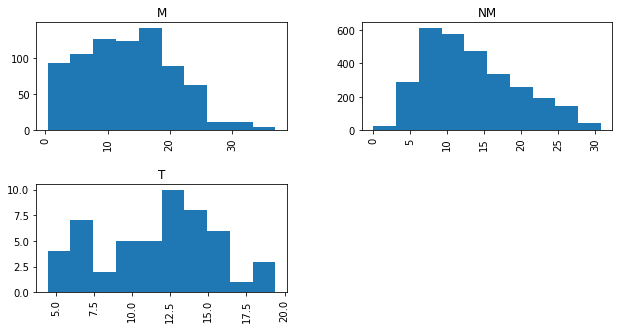

In [0]:
df_log.PORO.hist(by = df_log.EOD_NMT, figsize=(10,5))

print('Marine:\t', stats.describe(df_log.PORO[df_log.EOD_NMT == 'M']))
print('Non-Marine:\t', stats.describe(df_log.PORO[df_log.EOD_NMT == 'NM']))
print('Transitional:\t', stats.describe(df_log.PORO[df_log.EOD_NMT == 'T']))

Since 'T' has too little datapoints (51 observations), we will drop it from further analysis. We run the Shapiro-Wilk test to test for normality of the marine (M) and non-marine (NM) datasets.

In [0]:
print('Shapiro-Wilk - Porosity')
print('Marine:\t', stats.shapiro(df_log.PORO[df_log.EOD_NMT == 'M']))
print('Non-Marine:\t', stats.shapiro(df_log.PORO[df_log.EOD_NMT == 'NM']))

Shapiro-Wilk - Porosity
Marine:	 (0.9783213138580322, 2.867733384093185e-09)
Non-Marine:	 (0.9580556154251099, 2.095612798431258e-28)


Each p-value is less than 0.05 while W is close to 1. It appears that each are not normally distributed. Hence, we run the Kruskal-Wallis test for nonparametric distributions.

In [0]:
print('Kruskal-Wallis - Porosity')
stats.kruskal(df_log.PORO[df_log.EOD_NMT == 'M'], df_log.PORO[df_log.EOD_NMT == 'NM'])

Kruskal-Wallis - Porosity


KruskalResult(statistic=0.016017755234392046, pvalue=0.8992876519001914)

Since the p-value is high (>0.05), we fail to reject the null hypothesis and conclude that there is no significant difference in porosity between marine and non-marine sandstones.

## b) Is there a significant difference in permeability in different depositional environments (marine vs nonmarine)? 

Marine:	 DescribeResult(nobs=770, minmax=(-3.5228787452803374, 3.4183012913197452), mean=0.06887516923361102, variance=3.055585277522523, skewness=0.018088671581127678, kurtosis=-1.1427641667549464)
Non-Marine:	 DescribeResult(nobs=2957, minmax=(-3.22, 3.890000000000001), mean=0.1906482851765282, variance=1.7890953390863538, skewness=0.4018439082386996, kurtosis=-0.592021157492955)
Transitional:	 DescribeResult(nobs=51, minmax=(-3.775, 3.473632926873841), mean=0.6188224679654886, variance=4.705597685518956, skewness=-0.690725782688597, kurtosis=-0.8005978517829955)


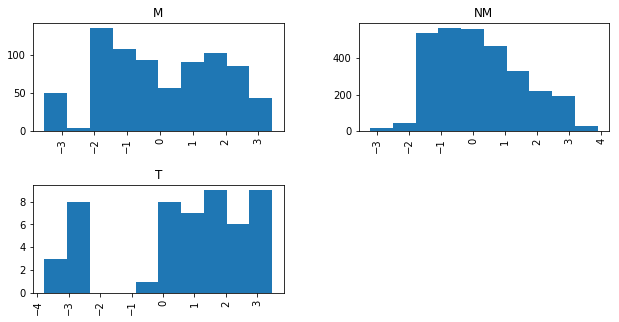

In [0]:
df_log.perm_log10.hist(by = df_log.EOD_NMT, figsize=(10,5))

print('Marine:\t', stats.describe(df_log.perm_log10[df_log.EOD_NMT == 'M']))
print('Non-Marine:\t', stats.describe(df_log.perm_log10[df_log.EOD_NMT == 'NM']))
print('Transitional:\t', stats.describe(df_log.perm_log10[df_log.EOD_NMT == 'T']))

Once again, since 'T' has too little datapoints (51 observations), we will drop it from further analysis. We run the Shapiro-Wilk test to test for normality of the marine (M) and non-marine (NM) datasets.



In [0]:
print('Shapiro-Wilk - Permeability')
print('Marine:\t', stats.shapiro(df_log.perm_log10[df_log.EOD_NMT == 'M']))
print('Non-Marine:\t', stats.shapiro(df_log.perm_log10[df_log.EOD_NMT == 'NM']))

Shapiro-Wilk - Permeability
Marine:	 (0.9573174118995667, 3.60945844881614e-14)
Non-Marine:	 (0.9716526865959167, 9.222044306132351e-24)


Each p-value is less than 0.05. It appears that each are not normally distributed. Hence, we run the Kruskal-Wallis test for nonparametric distributions.

In [0]:
print('Kruskal-Wallis - Permeability')
stats.kruskal(df_log.perm_log10[df_log.EOD_NMT == 'M'], df_log.perm_log10[df_log.EOD_NMT == 'NM'])
stats.kruskal(df_log.PERM[df_log.EOD_NMT == 'M'], df_log.PERM[df_log.EOD_NMT == 'NM'])

Kruskal-Wallis - Permeability


KruskalResult(statistic=4.5466436637723175, pvalue=0.03298334075099548)

Since the p-value is low (< 0.05), we reject the null hypothesis and conclude that there is significant difference in permeability between marine and non-marine sandstones.

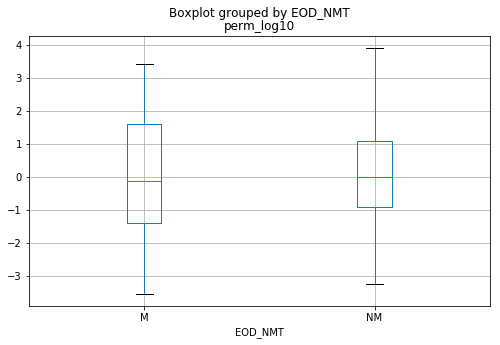

In [0]:
df_log.query('EOD_NMT == ["M", "NM"]').boxplot('perm_log10', by = 'EOD_NMT', figsize=(8,5))

In [0]:
df_log.PERM[df_log.EOD_NMT == "NM"].median() - df_log.PERM[df_log.EOD_NMT == "M"].median()

0.28213787163029536

Looking at the boxplot, we see a slight difference in medians between the marine and non-marine datasets (NM is about 0.28 millidarcy higher than M). Our test suggests that this difference is statistically significant (i.e. is not due to random errors or sampling bias).

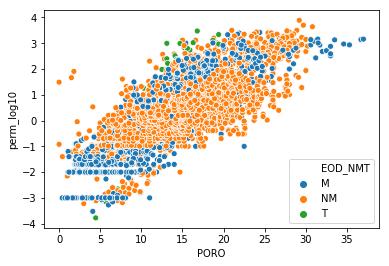

In [0]:
# extra analysis - no distinct pattern seen
import seaborn as sns
sns.scatterplot(data = df_log, x = 'PORO', y = 'perm_log10', hue = 'EOD_NMT')

# 3. Analyzing the Effect of Grain Sizes

## a) Is there a significant difference in porosity in sedimentary deposits of different grain sizes?

coarse:	 DescribeResult(nobs=48, minmax=(6.8, 22.7), mean=13.766666666666666, variance=14.023120567375885, skewness=0.5561539151792075, kurtosis=0.06856199191436074)
medium:	 DescribeResult(nobs=304, minmax=(1.5, 28.8), mean=18.167927631578944, variance=30.96646796834289, skewness=-0.442630166685388, kurtosis=-0.23492667854974814)
fine:	 DescribeResult(nobs=552, minmax=(1.0, 28.7), mean=14.057010869565216, variance=43.080406112404326, skewness=-0.08929310727630746, kurtosis=-0.7829625909253153)
very fine:	 DescribeResult(nobs=401, minmax=(0.38, 27.9), mean=11.246109725685788, variance=39.72677782793017, skewness=0.4750625668161664, kurtosis=-0.48263709230307406)


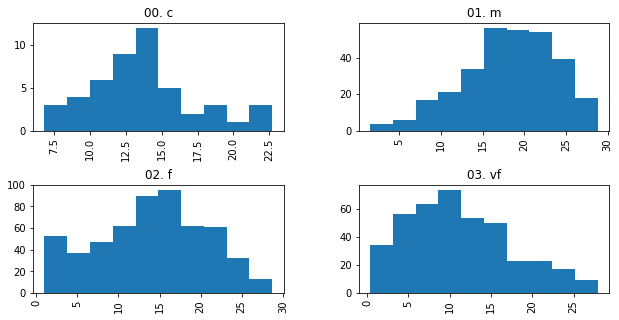

In [0]:
df_log = df_log.query('GRAINSIZE_CAT != "silt"')
df_log.PORO.hist(by = df_log.GRAINSIZE_CAT, figsize=(10,5))

print('coarse:\t', stats.describe(df_log.PORO[df_log.GRAINSIZE_CAT == '00. c']))
print('medium:\t', stats.describe(df_log.PORO[df_log.GRAINSIZE_CAT == '01. m']))
print('fine:\t', stats.describe(df_log.PORO[df_log.GRAINSIZE_CAT == '02. f']))
print('very fine:\t', stats.describe(df_log.PORO[df_log.GRAINSIZE_CAT == '03. vf']))

Since the coarse-grained samples (c) are too few (48 observations), we will drop it from further analysis. We run the Shapiro-Wilk test to test for normality of the medium- (m), fine- (f), and very fine- (vf) grained sandstones.

In [0]:
print('Shapiro-Wilk - Porosity')
print('medium:\t', stats.shapiro(df_log.PORO[df_log.GRAINSIZE_CAT == '01. m']))
print('fine:\t', stats.shapiro(df_log.PORO[df_log.GRAINSIZE_CAT == '02. f']))
print('very fine:', stats.shapiro(df_log.PORO[df_log.GRAINSIZE_CAT == '03. vf']))

Shapiro-Wilk - Porosity
medium:	 (0.9802301526069641, 0.0003307847655378282)
fine:	 (0.979744553565979, 6.211612912920828e-07)
very fine: (0.9686257839202881, 1.4015975580150553e-07)


Each p-value is less than 0.05. It appears that each are not normally distributed. Hence, we run the Kruskal-Wallis test for nonparametric distributions.

In [0]:
print('Kruskal-Wallis - Porosity')
stats.kruskal(df_log.PORO[df_log.GRAINSIZE_CAT == '01. m'], 
              df_log.PORO[df_log.GRAINSIZE_CAT == '02. f'],
              df_log.PORO[df_log.GRAINSIZE_CAT == '03. vf'])

Kruskal-Wallis - Porosity


KruskalResult(statistic=186.27514086932567, pvalue=3.5552250913742595e-41)

Since the p-value is low (< 0.05), we reject the null hypothesis and conclude that there is significant difference in porosity between medium-, fine-, and very fine-grained sandstones.

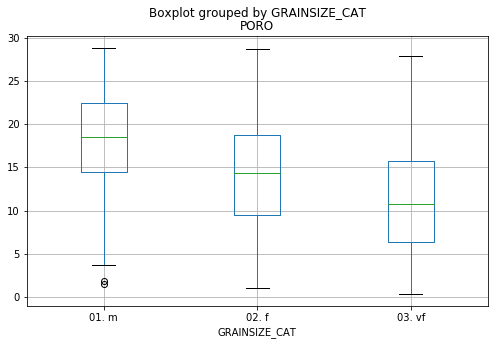

In [0]:
df_log.query('GRAINSIZE_CAT == ["01. m", "02. f", "03. vf"]').boxplot('PORO', by = 'GRAINSIZE_CAT', figsize=(8,5))

Looking at the boxplot, we see that the medium-grained sandstones have the highest median porosity, followed by fine-grained then very fine-grained sandstones.

In [0]:
# difference in median between medium and fine
df_log.PORO[df_log.GRAINSIZE_CAT == "01. m"].median() - df_log.PORO[df_log.GRAINSIZE_CAT == "02. f"].median()

In [0]:
# difference in median between fine and very fine
df_log.PORO[df_log.GRAINSIZE_CAT == "01. m"].median() - df_log.PORO[df_log.GRAINSIZE_CAT == "03. vf"].median()

## b) Is there a significant difference in permeability in sedimentary deposits of different grain sizes?

coarse:	 DescribeResult(nobs=48, minmax=(-0.6989700043360187, 3.473632926873841), mean=1.613214052321288, variance=1.1740913052458175, skewness=-0.131056292691017, kurtosis=-1.052418758231587)
medium:	 DescribeResult(nobs=304, minmax=(-1.7000000000000002, 3.4313637641589874), mean=1.218552151615055, variance=1.3684771592016458, skewness=-0.6225338417085455, kurtosis=-0.31129116512127375)
fine:	 DescribeResult(nobs=552, minmax=(-3.0, 3.3941013020400446), mean=0.09314302016318853, variance=2.1322903368599566, skewness=0.06201964009028496, kurtosis=-0.9503034394848089)
very fine:	 DescribeResult(nobs=401, minmax=(-3.5228787452803374, 3.184691430817599), mean=-0.5107487360986894, variance=2.543229284982514, skewness=0.4806817562442162, kurtosis=-0.6431730294676572)


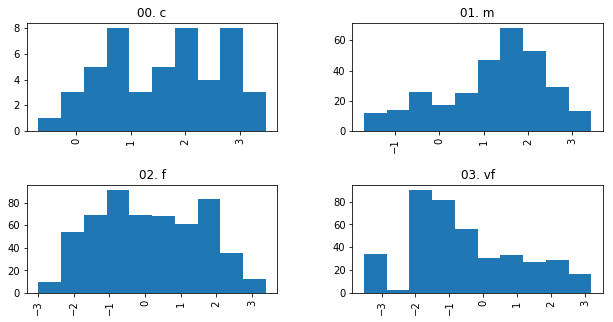

In [0]:
df_log = df_log.query('GRAINSIZE_CAT != "silt"')
df_log.perm_log10.hist(by = df_log.GRAINSIZE_CAT, figsize=(10,5))

print('coarse:\t', stats.describe(df_log.perm_log10[df_log.GRAINSIZE_CAT == '00. c']))
print('medium:\t', stats.describe(df_log.perm_log10[df_log.GRAINSIZE_CAT == '01. m']))
print('fine:\t', stats.describe(df_log.perm_log10[df_log.GRAINSIZE_CAT == '02. f']))
print('very fine:\t', stats.describe(df_log.perm_log10[df_log.GRAINSIZE_CAT == '03. vf']))

Once again, since the coarse-grained samples (c) are too few (48 observations), we will drop it from further analysis. We run the Shapiro-Wilk test to test for normality of the medium- (m), fine- (f), and very fine- (vf) grained sandstones.

In [0]:
print('Shapiro-Wilk - Permeability')
print('medium:\t', stats.shapiro(df_log.perm_log10[df_log.GRAINSIZE_CAT == '01. m']))
print('fine:\t', stats.shapiro(df_log.perm_log10[df_log.GRAINSIZE_CAT == '02. f']))
print('very fine:\t', stats.shapiro(df_log.perm_log10[df_log.GRAINSIZE_CAT == '03. vf']))

Shapiro-Wilk - Permeability
medium:	 (0.9551874995231628, 4.988344670664446e-08)
fine:	 (0.9727126955986023, 1.2863046627842323e-08)
very fine:	 (0.9477546215057373, 1.077964384421648e-10)


Each p-value is less than 0.05. It appears that each are not normally distributed. Hence, we run the Kruskal-Wallis test for nonparametric distributions.

In [0]:
print('Kruskal-Wallis - Permeability')
stats.kruskal(df_log.perm_log10[df_log.GRAINSIZE_CAT == '01. m'], 
              df_log.perm_log10[df_log.GRAINSIZE_CAT == '02. f'],
              df_log.perm_log10[df_log.GRAINSIZE_CAT == '03. vf'])

Kruskal-Wallis - Permeability


KruskalResult(statistic=208.10158559270386, pvalue=6.476119454540436e-46)

Since the p-value is low (< 0.05), we reject the null hypothesis and conclude that there is significant difference in log permeability between medium-, fine-, and very fine-grained sandstones.

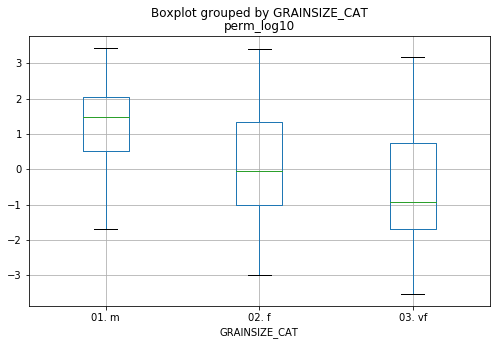

In [0]:
df_log.query('GRAINSIZE_CAT == ["01. m", "02. f", "03. vf"]').boxplot('perm_log10', by = 'GRAINSIZE_CAT', figsize=(8,5))

Looking at the boxplot, we see that the medium-grained sandstones have the highest median permeability, followed by fine-grained then very fine-grained sandstones.

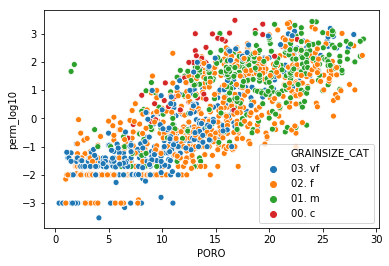

In [0]:
# extra analysis - no distinct pattern seen
sns.scatterplot(data = df_log, x = 'PORO', y = 'perm_log10', hue = 'GRAINSIZE_CAT')

# Conclusion

From this experiment, we conclude the following:
1. There is a strong positive correlation between porosity and log(permeability) (R~0.82).
2. a. There is no significant difference in porosity between marine and non-marine sandstones.  
b. There is significant difference in permeability between marine and non-marine sandstones, with the median of nonmarine being slightly higher than marine.
3. a. There is significant difference in porosity between medium-, fine-, and very fine-grained sandstones, with medium-grained sandstones having the highest median porosity, followed by fine-grained then very fine-grained sandstones.  
b. There is significant difference in permeability between medium-, fine-, and very fine-grained sandstones, with medium-grained sandstones having the highest median permeability, followed by fine-grained then very fine-grained sandstones.
    
Implication:
1. We can predict porosity from permeability of sandstones and vice versa (high porosity yields high permeability).
2. Even though there is statistical significance in the differences in permeability between marine and non-marine sandstones, the difference of 0.28 mD may not have significant business impact in terms of the ease of extracting fluids or fossil fuels. Thus, there might not be a difference permeability-wise whether we're drilling in marine or non-marine environments.
3. The best kind of sandstones to drill to (easily) extract fluids from are coarser-grained sandstones than finer-grained ones.

Suggestion for further research:
1. Collect more transitional and coarse sample datasets to compare against current analysis
2. Collect datasets for different kinds of rocks other than sandstones
3. Differentiate further the different marine and non-marine depositional environments (e.g. coastal, dune, fluvial, marine shelf etc) to observe its effect on porosity and permeability